In [3]:
import torch
torch.cuda.is_available()

True

# Carga del Modelo

In [163]:
HOME_PATH = "/home/223C1851Rodrigo" # path where you cloned musicfm

import os
import sys
import torch

sys.path.append(HOME_PATH)
from musicfm.model.musicfm_25hz import MusicFM25Hz

# load MusicFM
musicfm = MusicFM25Hz(
    is_flash=False,
    stat_path=os.path.join(HOME_PATH, "musicfm", "data", "msd_stats.json"),
    model_path=os.path.join(HOME_PATH, "musicfm", "data", "pretrained_msd.pt"),
)

# to GPUs Esto sigue matándo el código
# wav = wav.cuda()
# musicfm = musicfm.cuda()
musicfm.eval()


/home/223C1851Rodrigo/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


MusicFM25Hz(
  (preprocessor_melspec_2048): MelSTFT(
    (mel_stft): MelSpectrogram(
      (spectrogram): Spectrogram()
      (mel_scale): MelScale()
    )
    (amplitude_to_db): AmplitudeToDB()
  )
  (quantizer_melspec_2048_0): RandomProjectionQuantizer()
  (conv): Conv2dSubsampling(
    (conv): Sequential(
      (0): Res2dModule(
        (conv1): Conv2d(1, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
        (conv3): Conv2d(1, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Res2dModule(
        (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), pad

In [131]:
##Entendiendo los atributos del modelo:

print("Model attributes:")
for name, param in musicfm.named_parameters():
    print(name)

print("\nModel buffers:")
for name, buffer in musicfm.named_buffers():
    print(name)

print("\nModel modules:")
for name, module in musicfm.named_modules():
    print(name)

Model attributes:
cls_token
conv.conv.0.conv1.weight
conv.conv.0.conv1.bias
conv.conv.0.bn1.weight
conv.conv.0.bn1.bias
conv.conv.0.conv2.weight
conv.conv.0.conv2.bias
conv.conv.0.bn2.weight
conv.conv.0.bn2.bias
conv.conv.0.conv3.weight
conv.conv.0.conv3.bias
conv.conv.0.bn3.weight
conv.conv.0.bn3.bias
conv.conv.1.conv1.weight
conv.conv.1.conv1.bias
conv.conv.1.bn1.weight
conv.conv.1.bn1.bias
conv.conv.1.conv2.weight
conv.conv.1.conv2.bias
conv.conv.1.bn2.weight
conv.conv.1.bn2.bias
conv.conv.1.conv3.weight
conv.conv.1.conv3.bias
conv.conv.1.bn3.weight
conv.conv.1.bn3.bias
conv.linear.weight
conv.linear.bias
conformer.pos_conv_embed.conv.bias
conformer.pos_conv_embed.conv.parametrizations.weight.original0
conformer.pos_conv_embed.conv.parametrizations.weight.original1
conformer.layer_norm.weight
conformer.layer_norm.bias
conformer.layers.0.ffn1_layer_norm.weight
conformer.layers.0.ffn1_layer_norm.bias
conformer.layers.0.ffn1.intermediate_dense.weight
conformer.layers.0.ffn1.intermediat

In [ ]:
# get embeddings utilizaremos

emb = musicfm.get_latent(wav, layer_ix=7)
##can expect better performance in downstream tasks by fine-tuning the foundation model. 
##In this scenario, employ musicfm.train() and extract the final embeddings by setting layer_ix=12

In [20]:
##Para entender lo spasos del modelo nos podemos fijar en su estructura interna
print(musicfm.forward)

<bound method MusicFM25Hz.forward of MusicFM25Hz(
  (preprocessor_melspec_2048): MelSTFT(
    (mel_stft): MelSpectrogram(
      (spectrogram): Spectrogram()
      (mel_scale): MelScale()
    )
    (amplitude_to_db): AmplitudeToDB()
  )
  (quantizer_melspec_2048_0): RandomProjectionQuantizer()
  (conv): Conv2dSubsampling(
    (conv): Sequential(
      (0): Res2dModule(
        (conv1): Conv2d(1, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
        (conv3): Conv2d(1, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Res2dModule(
        (conv1): Conv2d(512, 512, k

# Music FMA

In [119]:
from fma import utils
import numpy
import pandas as pd
import IPython.display as ipd
tracks = utils.load('fma/data/fma_metadata/tracks.csv')
genres = utils.load('fma/data/fma_metadata/genres.csv')
features = utils.load('fma/data/fma_metadata/features.csv')
echonest = utils.load('fma/data/fma_metadata/echonest.csv')

In [23]:
small_tracks = tracks[tracks['set', 'subset'] <= 'small']
print(tracks.shape,small_tracks.shape)

(106574, 52) (8000, 52)


In [24]:
print(small_tracks)

            album                                                              \
         comments        date_created date_released        engineer favorites   
track_id                                                                        
2               0 2008-11-26 01:44:45    2009-01-05             NaN         4   
5               0 2008-11-26 01:44:45    2009-01-05             NaN         4   
10              0 2008-11-26 01:45:08    2008-02-06             NaN         4   
140             1 2008-11-26 01:49:59    2007-05-22             NaN         1   
141             0 2008-11-26 01:49:57    2009-01-16             NaN         1   
...           ...                 ...           ...             ...       ...   
154308          0 2017-03-05 04:57:38    2017-03-05             NaN         0   
154309          0 2017-03-05 04:57:38    2017-03-05             NaN         0   
154413          0 2017-03-07 18:44:11           NaT  Ernie Indradat         0   
154414          0 2017-03-07

In [25]:
small_features=features[tracks['set', 'subset'] <= 'small']
print(small_features.shape)

(8000, 518)


In [26]:
##Estos son los índices de fma que usaremos
print(small_features.index)

Index([     2,      5,     10,    140,    141,    148,    182,    190,    193,
          194,
       ...
       153956, 154303, 154305, 154306, 154307, 154308, 154309, 154413, 154414,
       155066],
      dtype='int64', name='track_id', length=8000)


In [27]:
##features fma (no relevantes por ahora)
print('{1} features for {0} tracks'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])
for column in columns:
    ipd.display(small_features[column].head().style.format('{:.2f}'))

518 features for 106574 tracks


## Conversión FMA mp3 a WAV

In [30]:
from pydub import AudioSegment
import torch
import io


src = "fma/data/fma_small/000/000002.mp3"

# Cargar el archivo de audio y exportarlo a WAV 
sound = AudioSegment.from_file(src)  
buffer = io.BytesIO()
wav_1=sound.export(buffer, format="wav")

# Obtener los bytes del buffer
audio_bytes = buffer.getvalue()

# Crear un tensor de PyTorch desde los bytes del audio
audio_tensor = torch.tensor(list(audio_bytes), dtype=torch.float)

print(audio_tensor)

tensor([ 82.,  73.,  70.,  ..., 244., 216., 240.])


In [31]:
print(wav_1)

In [32]:
print(audio_tensor.shape)

torch.Size([5287912])


## Transformación de MP3 a Waveform imput del modelo (Distinto a mel_spectrogram?)


In [140]:
import torchaudio

In [165]:
##usamos para cargar elementos de audio mp3 de FMA
##usamos para cargar elementos de audio mp3 de FMA

def formato_entrada_musicfm(waveform,sample_rate):
    if sample_rate != 24000:
        waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=24000)(waveform)
# Ensure the waveform is at the expected length (2 channels)
    if waveform.size(0) == 1:
        waveform = waveform.repeat(2, 1)
        
    return waveform, sample_rate


def carga_Fma(audio_path):
    waveform, samplerate = torchaudio.load(audio_path)
    waveform_corrected, samplerate_corrected = formato_entrada_musicfm(waveform,samplerate)
    return  waveform_corrected, samplerate_corrected

    

In [166]:
audio_path = "fma/data/fma_small/000/000002.mp3"
waveform,sample_rate=carga_Fma(audio_path)
waveform,sample_rate

(tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.1928, -0.2352, -0.1341],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.3264, -0.2854, -0.1651]]),
 44100)

In [129]:
waveform.shape

torch.Size([2, 719438])

In [138]:
#############TO FIGURE OUT (i think this is not needed then)############################
#############Conversion de Waveform a Mel_Spectrogram  #################################

melstft= MelSTFT()
mel_spectrogram = melstft(waveform)
print(mel_spectrogram.shape)
print(mel_spectrogram)

#### Por lo q se entiende en la siguiente celda, el espectrograma son las features que produce el modelo

torch.Size([2, 128, 2998])
tensor([[[3.6075e-03, 4.2904e-02, 1.7014e-01,  ..., 2.7550e+01,
          1.0374e+02, 1.8609e+02],
         [1.5773e-03, 4.5273e-02, 2.1487e-01,  ..., 6.0975e+01,
          2.2203e+02, 4.4912e+02],
         [7.9695e-03, 3.9945e-02, 1.4694e-01,  ..., 5.4540e+02,
          6.3769e+02, 6.5958e+02],
         ...,
         [1.0342e-03, 4.3857e-03, 1.3626e-02,  ..., 2.4665e+00,
          1.3200e+00, 1.2531e+00],
         [1.8091e-03, 5.4570e-03, 1.4067e-02,  ..., 2.2443e+00,
          7.8771e-01, 6.9891e-01],
         [5.0156e-03, 2.2484e-02, 6.9393e-02,  ..., 1.5188e+00,
          8.2003e-01, 6.5203e-01]],

        [[4.4631e-03, 4.3730e-02, 1.7541e-01,  ..., 3.3194e+01,
          1.4660e+02, 2.7336e+02],
         [3.8699e-03, 4.8109e-02, 2.1423e-01,  ..., 9.2491e+01,
          3.2979e+02, 6.5260e+02],
         [1.2038e-02, 3.3571e-02, 1.0001e-01,  ..., 6.1876e+02,
          8.1795e+02, 9.3838e+02],
         ...,
         [1.7482e-03, 8.2930e-03, 2.6112e-02,  ..., 

In [139]:
from musicfm.modules.features import MelSTFT
melfeatures= MelSTFT()

melfeatures.forward(waveform) #ESTAS SON LAS FEATURES CON LAS Q TRABAJAREMOS (El melspectrograma q hicimos antes a mané)

tensor([[[3.6075e-03, 4.2904e-02, 1.7014e-01,  ..., 2.7550e+01,
          1.0374e+02, 1.8609e+02],
         [1.5773e-03, 4.5273e-02, 2.1487e-01,  ..., 6.0975e+01,
          2.2203e+02, 4.4912e+02],
         [7.9695e-03, 3.9945e-02, 1.4694e-01,  ..., 5.4540e+02,
          6.3769e+02, 6.5958e+02],
         ...,
         [1.0342e-03, 4.3857e-03, 1.3626e-02,  ..., 2.4665e+00,
          1.3200e+00, 1.2531e+00],
         [1.8091e-03, 5.4570e-03, 1.4067e-02,  ..., 2.2443e+00,
          7.8771e-01, 6.9891e-01],
         [5.0156e-03, 2.2484e-02, 6.9393e-02,  ..., 1.5188e+00,
          8.2003e-01, 6.5203e-01]],

        [[4.4631e-03, 4.3730e-02, 1.7541e-01,  ..., 3.3194e+01,
          1.4660e+02, 2.7336e+02],
         [3.8699e-03, 4.8109e-02, 2.1423e-01,  ..., 9.2491e+01,
          3.2979e+02, 6.5260e+02],
         [1.2038e-02, 3.3571e-02, 1.0001e-01,  ..., 6.1876e+02,
          8.1795e+02, 9.3838e+02],
         ...,
         [1.7482e-03, 8.2930e-03, 2.6112e-02,  ..., 7.0903e+00,
          4.138

In [136]:
# ejecucion del modelo
logits, hidden_emb, losses, accuracies = musicfm(waveform)

print(f"Logits: {logits}")
print(f"Hidden Embeddings: {hidden_emb}")
print(f"Losses: {losses}")
print(f"Accuracies: {accuracies}")

melspec_2048
Logits: {'melspec_2048': tensor([[[-5.4156e+00, -4.8034e+00, -3.4863e+00,  ..., -1.8538e+00,
          -2.1462e+00,  2.2615e+00],
         [-2.1786e+00, -7.2724e+00, -4.6314e+00,  ..., -2.9317e+00,
          -4.4685e+00,  2.5475e+00],
         [-6.0133e+00, -5.0642e+00, -4.0868e+00,  ..., -2.9425e+00,
          -3.8158e+00,  4.3461e-01],
         ...,
         [-5.9427e+00, -1.5842e+01, -2.5522e+00,  ..., -3.7271e+00,
          -5.4131e+00, -6.0288e+00],
         [-6.7576e+00, -1.0876e+01, -2.9720e-01,  ..., -2.6754e+00,
          -2.6043e+00, -2.3186e+00],
         [-4.5350e+00, -5.5007e+00, -4.3955e+00,  ..., -4.0843e+00,
           1.4577e-02, -2.3998e+00]],

        [[-5.4150e+00, -4.9878e+00, -3.4063e+00,  ..., -1.2705e+00,
          -2.5881e+00,  1.8576e+00],
         [-2.9142e+00, -7.4953e+00, -4.8341e+00,  ..., -2.0270e+00,
          -4.6621e+00,  2.2232e+00],
         [-5.3205e+00, -4.1598e+00, -5.4962e+00,  ..., -3.2623e+00,
          -4.3541e+00,  4.4701e-01],
 

In [137]:
##En particular nos interesan las features de la capa 7 ( hay 13)
feature_relevante=musicfm.get_latent(waveform, layer_ix=7)
feature_relevante

tensor([[[ 1.6663,  0.2226, -0.1251,  ...,  3.0925,  0.0948, -0.7450],
         [ 0.6308,  1.0729,  0.2759,  ...,  2.3217,  0.4266,  2.2937],
         [ 0.0884,  0.2561,  0.3109,  ...,  1.6468,  1.0545,  2.1562],
         ...,
         [ 1.9420, -0.1953, -0.6135,  ..., -0.2323, -1.0674, -1.3723],
         [ 2.0954,  0.6567, -0.7051,  ..., -1.8276,  0.2145,  0.0352],
         [ 2.0884,  0.5084,  0.0401,  ..., -1.8066,  0.0817, -0.7698]],

        [[ 1.7833,  0.3681, -0.0360,  ...,  3.1234,  0.0893, -0.8324],
         [ 0.8150,  1.2337,  0.2483,  ...,  2.4103,  0.2430,  2.4229],
         [-0.0277,  0.2681,  0.3290,  ...,  2.2988,  1.1592,  1.0914],
         ...,
         [ 2.0627, -0.0762, -0.5147,  ..., -0.3023, -0.8250, -1.0214],
         [ 1.9830,  0.5745, -0.6564,  ..., -1.8855,  0.2623,  0.0985],
         [ 2.0324,  0.4809,  0.0923,  ..., -1.8254,  0.2351, -0.5278]]])

## INTENTANDO ENTENDER EL OUTPUT DEL MODELO (Futuro eliminar)

In [62]:
print(musicfm.get_predictions(waveform))

({'melspec_2048': tensor([[[ -6.2487,  -5.7592,  -4.0279,  ...,  -1.2765,  -6.3854,  -0.3297],
         [ -6.0514,  -8.1512,  -4.8746,  ...,  -0.3299,  -6.6612,  -0.7877],
         [ -9.1738,  -7.4339,  -5.2042,  ...,  -0.9062,  -6.3913,  -1.9558],
         ...,
         [-10.1124,  -9.2210,  -2.0418,  ...,  -2.9478,  -2.1300,  -3.6806],
         [ -9.9257,  -9.2880,  -1.7650,  ...,  -3.2899,  -2.5922,  -4.3124],
         [ -9.5668,  -7.4669,  -4.8572,  ...,  -4.5629,  -2.9587,  -5.3015]],

        [[ -6.4499,  -5.9376,  -4.3463,  ...,  -1.6510,  -6.2286,  -0.0462],
         [ -6.0048,  -7.1658,  -4.8327,  ...,  -0.8349,  -6.5593,  -0.5721],
         [ -9.1330,  -5.8736,  -5.7256,  ...,  -0.5056,  -6.0166,  -0.5908],
         ...,
         [ -9.7279,  -9.0753,  -1.2275,  ...,  -2.3647,  -2.5810,  -4.4660],
         [ -9.1420,  -8.7241,  -0.9378,  ...,  -3.0300,  -3.1182,  -5.2854],
         [ -9.1132,  -7.5127,  -3.8704,  ...,  -4.1647,  -4.3740,  -5.8554]]],
       grad_fn=<SliceBackw

In [63]:
print(musicfm.get_targets(waveform)["melspec_2048"].shape)
print(musicfm.get_targets(waveform))

melspec_2048
torch.Size([2, 750])
melspec_2048
{'melspec_2048': tensor([[ 670, 2906, 3386,  ...,  204,  204, 3920],
        [2508,  605, 3386,  ...,  204, 2058, 1601]])}


In [102]:
#### Tamaño de features
tamano_output=melfeatures.forward(waveform)
tamano_output.shape

torch.Size([2, 128, 2998])

In [95]:
#### Tamaño del waveform generado del ejemplo de fma
waveform.shape

torch.Size([2, 719438])

# MadMom (probablemente futuro eliminar )

In [141]:
##TESTING MADMOM

import audiosegment
import torch
import io
import madmom
import matplotlib.pyplot as plt


In [147]:
###MADMON trabaja con WAV no mp3 por lo que primero definimos un convertidor mp3-> Wav
def mp3_wav_converter(audio_path):
    sound = audiosegment.from_file(audio_path).resample(channels=1) ##channels para solucionar el problema del estereo
    buffer = io.BytesIO()
    wav=sound.export(buffer, format="wav")
    return wav



In [151]:
##Para ver la señal en de madmom
fma_wav= mp3_wav_converter(audio_path)
signal = madmom.audio.signal.Signal(fma_wav)
signal, signal.sample_rate

(Signal([    0,     0,     0, ..., -8105, -6518, -3446], dtype=int16), 44100)

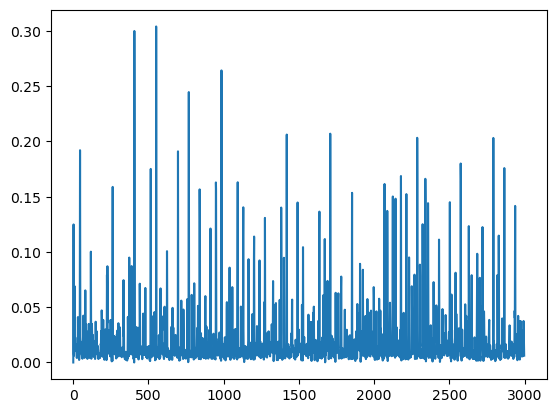

In [152]:
##BEATDOWN TRACKING:
#MADMOM de forma visual (No relevante para la aplicación, eliminar en el futuro)

class SuperFluxProcessor(madmom.processors.SequentialProcessor):
    
    def __init__(self, num_bands=24, diff_max_bins=3, positive_diffs=True):
        # define the processing chain
        spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogramProcessor(num_bands=num_bands)
        diff = madmom.audio.spectrogram.SpectrogramDifferenceProcessor(diff_max_bins=diff_max_bins,
                                                                       positive_diffs=positive_diffs)
        from functools import partial
        mean = partial(np.mean, axis=1)
        # sequentially process everything
        super(SuperFluxProcessor, self).__init__([spec, diff, mean])


##activamos
superflux_processor = SuperFluxProcessor()

##Representamos
superflux_2 = superflux_processor.process(fma_wav)
plt.plot(superflux_2)

In [153]:
########################## MADMOM BEAT ##########################

from madmom.features import RNNBeatProcessor

beatproc= RNNBeatProcessor()
beat_output=beatproc(fma_wav)
beat_output

array([0.00888551, 0.01266195, 0.02099505, ..., 0.04672858, 0.02924436,
       0.01950937], dtype=float32)

In [154]:
output.size

2998

In [155]:
from madmom.features import BeatTrackingProcessor
beat_track_proc = BeatTrackingProcessor(fps=100)
btp=beat_track_proc(beat_output)
btp

/home/223C1851Rodrigo/madmom/madmom/features/tempo.py:724: UserWarning: Usage of `method` is deprecated as of version 0.17. Please pass a dedicated `TempoHistogramProcessor` instance as `histogram_processor`.Functionality will be removed in version 0.19.
  warnings.warn(


array([ 0.46,  1.18,  1.9 ,  2.62,  3.35,  4.07,  4.79,  5.52,  6.24,
        6.97,  7.69,  8.41,  9.13,  9.85, 10.57, 11.3 , 12.02, 12.74,
       13.46, 14.19, 14.91, 15.62, 16.35, 17.08, 17.81, 18.53, 19.25,
       19.98, 20.7 , 21.42, 22.14, 22.87, 23.59, 24.32, 25.03, 25.76,
       26.48, 27.21, 27.93, 28.65, 29.37])

In [156]:
################################### MADMOM DOWNBEAT ###################################
######### RightNow THIS first part is our TARGET para la cabeza de downbeat #########
from madmom.features import DBNDownBeatTrackingProcessor,RNNDownBeatProcessor


downbeat=RNNDownBeatProcessor()(fma_wav)
downbeat


array([[0.01169364, 0.00089977],
       [0.02186991, 0.00214222],
       [0.05167745, 0.0051928 ],
       ...,
       [0.01720524, 0.00152045],
       [0.00852709, 0.00116641],
       [0.00461018, 0.00085153]], dtype=float32)

In [158]:
downbeat.shape

(2998, 2)

In [159]:
##### Los deseados downbeat con los que evaluaremos con mir_eval y el target
##### de el dataset Harmomix 

proc_downbeat = DBNDownBeatTrackingProcessor(beats_per_bar=[3, 4], fps=100)
proc_downbeat(downbeat)


array([[ 0.08,  4.  ],
       [ 0.45,  1.  ],
       [ 0.83,  2.  ],
       [ 1.17,  3.  ],
       [ 1.55,  4.  ],
       [ 1.89,  1.  ],
       [ 2.27,  2.  ],
       [ 2.62,  3.  ],
       [ 3.  ,  4.  ],
       [ 3.34,  1.  ],
       [ 3.72,  2.  ],
       [ 4.07,  3.  ],
       [ 4.42,  4.  ],
       [ 4.79,  1.  ],
       [ 5.15,  2.  ],
       [ 5.51,  3.  ],
       [ 5.87,  4.  ],
       [ 6.23,  1.  ],
       [ 6.61,  2.  ],
       [ 6.96,  3.  ],
       [ 7.32,  4.  ],
       [ 7.68,  1.  ],
       [ 8.04,  2.  ],
       [ 8.4 ,  3.  ],
       [ 8.77,  4.  ],
       [ 9.12,  1.  ],
       [ 9.49,  2.  ],
       [ 9.85,  3.  ],
       [10.2 ,  4.  ],
       [10.57,  1.  ],
       [10.93,  2.  ],
       [11.3 ,  3.  ],
       [11.65,  4.  ],
       [12.02,  1.  ],
       [12.38,  2.  ],
       [12.74,  3.  ],
       [13.1 ,  4.  ],
       [13.47,  1.  ],
       [13.82,  2.  ],
       [14.19,  3.  ],
       [14.55,  4.  ],
       [14.91,  1.  ],
       [15.27,  2.  ],
       [15.

In [161]:
dbeatproc= RNNDownBeatProcessor()
db_output= dbeatproc(fma_wav)
db_output

array([[0.01169364, 0.00089977],
       [0.02186991, 0.00214222],
       [0.05167745, 0.0051928 ],
       ...,
       [0.01720524, 0.00152045],
       [0.00852709, 0.00116641],
       [0.00461018, 0.00085153]], dtype=float32)

# Más entender dimensiones para adaptar la cabeza_downbeat tracking

In [162]:
##Utilizando fma dataset la primera entrada

logits, hidden_emb, losses, accuracies = musicfm(waveform) #traga spectrogramas no wavs recordar (good Harmonix)
hidden_emb[7].shape ## recordamos que tenemos 13 tensores pero queremos el 7 (por recomendación del autor)

melspec_2048


torch.Size([2, 750, 1024])

In [177]:
fma_path_5 ='fma/data/fma_small/000/000005.mp3'
fma5_waveform, fma5_samplerate = carga_Fma(fma_path_5)
logits, hidden_emb, losses, accuracies = musicfm(fma5_waveform) #traga spectrogramas no wavs recordar (good Harmonix)
hidden_emb[7].shape

#A notar, parece q ambas entradas de fma tienen el mismo tamaño (son pistas de igual longitud cabe mencionar)

melspec_2048


torch.Size([2, 750, 1024])

In [171]:
##Utilizando HARDMIX dataset entrada 1
##Carga de wav a tensor (será función en el futuro if needed)
hardmix_file1=torch.from_numpy(np.load('0001_12step-mel.npy')) 


logits, hidden_emb, losses, accuracies = musicfm(hardmix_file1)
emb_hardmix = musicfm.get_latent(hardmix_file1, layer_ix=7)
print(emb_hardmix.shape)

melspec_2048
torch.Size([80, 3, 1024])


No entiendo porq hay dimensionalidades distintas en ficheros distintos.

In [173]:
hardmix_file2=torch.from_numpy(np.load('0003_6foot7foot-mel.npy')) 


logits, hidden_emb, losses, accuracies = musicfm(hardmix_file2)
emb_hardmix = musicfm.get_latent(hardmix_file2, layer_ix=7)
print(emb_hardmix.shape)
###Distinto tamaño aun dentro de los hardmix? Porq 3 o 4 en la segunda entrada????

melspec_2048
torch.Size([80, 4, 1024])


In [25]:
##probing para modelo:

import torch
import torch.nn as nn
import torch.optim as optim

class ProbingModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=512, output_dim=2):  ##512 porq son las q dice y 3 por beats, downbeat y ninguno de ellos
        super(ProbingModel, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x


input_dim = [1, 292, 1024] ##WEIRD SIZE IN THE EMBEDING
hidden_dim = 512
output_dim = 2  

probing_model = ProbingModel(input_dim, hidden_dim, output_dim)


In [ ]:
###DATOS DEL HARMONIX DATASET:



In [ ]:
hardmix_test=torch.from_numpy(np.load('0001_12step-mel.npy'))

In [ ]:
hardmix_test